# Chapter 6. Tables

In [0]:
from datascience import *
import numpy as np

import matplotlib
#matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

#import warnings
#warnings.simplefilter(action="ignore", category=FutureWarning)


##Data로부터 Table 생성하기

In [13]:
cones = Table.read_table('cones.csv')
cones

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


- 6줄(row) : individuals
- 3열(column) : attributes
- Table 관련 명령어는 다음과 같은 형태
 - _table이름.methon이름(arguments)_

In [14]:
nba = Table.read_table('nba_salaries.csv')
nba

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


PLAYER,POSITION,TEAM,2015-2016 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


## Table 출력하기

In [15]:
cones.show()

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [16]:
cones.show(2)


Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75


##Column(열) 선택하기 

- select()
- drop()
- column() 혹은 label로 인덱싱 : numpy array로 선택

In [17]:
cones.select('Flavor')

Flavor
strawberry
chocolate
chocolate
strawberry
chocolate
bubblegum


In [18]:
cones.select('Flavor', 'Price')

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25
bubblegum,4.75


In [19]:
cones.column('Flavor')

array(['strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate',
       'bubblegum'], dtype='<U10')

In [20]:
cones['Flavor']

array(['strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate',
       'bubblegum'], dtype='<U10')

In [21]:
cones.drop('Color')

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25
bubblegum,4.75


주의) 앞의 method들에 의해 원래 Table 내용은 변화가 없다.

In [22]:
cones  

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


만약 열을 선택하여 새로운 Table을 원한다면 assignment 연산을 한다.

In [23]:
# 새 Table 생성
no_colors = cones.drop('Color')
no_colors

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25
bubblegum,4.75


##Column 추가하기
- with_column() 또는 with_columns() 사용


In [24]:
cones.with_columns(
    'Star', [3, 4, 4, 5, 3, 2],
    'Size', ['L', 'R', 'S', 'L', 'R', 'S']
)

Flavor,Color,Price,Star,Size
strawberry,pink,3.55,3,L
chocolate,light brown,4.75,4,R
chocolate,dark brown,5.25,4,S
strawberry,pink,5.25,5,L
chocolate,dark brown,5.25,3,R
bubblegum,pink,4.75,2,S


In [25]:
cones.with_column(
    'Star', [3, 4, 4, 5, 3, 2]
)

Flavor,Color,Price,Star
strawberry,pink,3.55,3
chocolate,light brown,4.75,4
chocolate,dark brown,5.25,4
strawberry,pink,5.25,5
chocolate,dark brown,5.25,3
bubblegum,pink,4.75,2


In [26]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


## Row(행) 선택하기
 - 인덱스를 통한 선택 :  take()
 - 조건식을 통한 선택 : where()

In [27]:
nba.show(7)

PLAYER,POSITION,TEAM,2015-2016 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333


In [28]:
# index를 사용한 argument

nba.take(0)


PLAYER,POSITION,TEAM,2015-2016 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717


In [29]:
# range를 사용한 argument

nba.take(np.arange(3, 6))


PLAYER,POSITION,TEAM,2015-2016 SALARY
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4


In [30]:
cones.where('Flavor', 'chocolate')

Flavor,Color,Price
chocolate,light brown,4.75
chocolate,dark brown,5.25
chocolate,dark brown,5.25


검색어는 정확하게 일치해야 한다. (exact matching)

In [31]:
cones.where('Flavor', 'Chocolate')

Flavor,Color,Price


In [32]:
nba.where('PLAYER', 'Stephen Curry')

PLAYER,POSITION,TEAM,2015-2016 SALARY
Stephen Curry,PG,Golden State Warriors,11.3708


Golden State Warriors 팀 선수들 정보를 조사해보자.

In [33]:
warriors = nba.where('TEAM', 'Golden State Warriors')
warriors.show() # 처음 10줄이 아닌 전체 출력

PLAYER,POSITION,TEAM,2015-2016 SALARY
Klay Thompson,SG,Golden State Warriors,15.501
Draymond Green,PF,Golden State Warriors,14.2609
Andrew Bogut,C,Golden State Warriors,13.8
Andre Iguodala,SF,Golden State Warriors,11.7105
Stephen Curry,PG,Golden State Warriors,11.3708
Jason Thompson,PF,Golden State Warriors,7.00847
Shaun Livingston,PG,Golden State Warriors,5.54373
Harrison Barnes,SF,Golden State Warriors,3.8734
Marreese Speights,C,Golden State Warriors,3.815
Leandro Barbosa,SG,Golden State Warriors,2.5


## Row 정렬하기
 - sort()
 - 역시 Table을 변화시키지는 않는다.

In [34]:
cones.sort('Price')

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
bubblegum,pink,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25


In [35]:
cones.sort('Price', descending=True)

Flavor,Color,Price
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75
chocolate,light brown,4.75
strawberry,pink,3.55


문자열도 sorting 가능하다.

In [36]:
cones.sort('Flavor', descending=True)

Flavor,Color,Price
strawberry,pink,5.25
strawberry,pink,3.55
chocolate,dark brown,5.25
chocolate,dark brown,5.25
chocolate,light brown,4.75
bubblegum,pink,4.75


NBA 전체 선수들을 연봉순으로 출력해 보자.

In [41]:
nba.sort('2015-2016 SALARY', descending=True)

PLAYER,POSITION,TEAM,2015-2016 SALARY
Kobe Bryant,SF,Los Angeles Lakers,25
Joe Johnson,SF,Brooklyn Nets,24.8949
LeBron James,SF,Cleveland Cavaliers,22.9705
Carmelo Anthony,SF,New York Knicks,22.875
Dwight Howard,C,Houston Rockets,22.3594
Chris Bosh,PF,Miami Heat,22.1927
Chris Paul,PG,Los Angeles Clippers,21.4687
Kevin Durant,SF,Oklahoma City Thunder,20.1586
Derrick Rose,PG,Chicago Bulls,20.0931
Dwyane Wade,SG,Miami Heat,20


PLAYER 이름순으로 정렬한 뒤, 상위 5명의 정보를 출력해 보자.

In [42]:
nba.sort('PLAYER').show(5)

PLAYER,POSITION,TEAM,2015-2016 SALARY
Aaron Brooks,PG,Chicago Bulls,2.25
Aaron Gordon,PF,Orlando Magic,4.17168
Aaron Harrison,SG,Charlotte Hornets,0.525093
Adreian Payne,PF,Minnesota Timberwolves,1.93884
Al Horford,C,Atlanta Hawks,12


SALARY가 큰 순서로 정렬한 뒤, 상위 5명의 정보를 출력해 보자.

In [44]:
nba.sort('2015-2016 SALARY',descending=True).show(5)


PLAYER,POSITION,TEAM,2015-2016 SALARY
Kobe Bryant,SF,Los Angeles Lakers,25
Joe Johnson,SF,Brooklyn Nets,24.8949
LeBron James,SF,Cleveland Cavaliers,22.9705
Carmelo Anthony,SF,New York Knicks,22.875
Dwight Howard,C,Houston Rockets,22.3594


Salary 상위 5명의 Table을 생성해 보자.

In [45]:
nba.sort('2015-2016 SALARY', descending=True).take(np.arange(5))


PLAYER,POSITION,TEAM,2015-2016 SALARY
Kobe Bryant,SF,Los Angeles Lakers,25
Joe Johnson,SF,Brooklyn Nets,24.8949
LeBron James,SF,Cleveland Cavaliers,22.9705
Carmelo Anthony,SF,New York Knicks,22.875
Dwight Howard,C,Houston Rockets,22.3594


## 상세조건으로 Row 선택하기
 -``are`` 객체 

연봉이 10(백만불)이 넘는 선수들을 찾아보자.

In [47]:
nba.where('2015-2016 SALARY', are.above(10))

PLAYER,POSITION,TEAM,2015-2016 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Joe Johnson,SF,Brooklyn Nets,24.8949
Thaddeus Young,PF,Brooklyn Nets,11.236
Al Jefferson,C,Charlotte Hornets,13.5
Nicolas Batum,SG,Charlotte Hornets,13.1253
Kemba Walker,PG,Charlotte Hornets,12
Derrick Rose,PG,Chicago Bulls,20.0931
Jimmy Butler,SG,Chicago Bulls,16.4075
Joakim Noah,C,Chicago Bulls,13.4


In [50]:
nba.where('2015-2016 SALARY', are.above(10)).sort('2015-2016 SALARY', descending=True)

PLAYER,POSITION,TEAM,2015-2016 SALARY
Kobe Bryant,SF,Los Angeles Lakers,25
Joe Johnson,SF,Brooklyn Nets,24.8949
LeBron James,SF,Cleveland Cavaliers,22.9705
Carmelo Anthony,SF,New York Knicks,22.875
Dwight Howard,C,Houston Rockets,22.3594
Chris Bosh,PF,Miami Heat,22.1927
Chris Paul,PG,Los Angeles Clippers,21.4687
Kevin Durant,SF,Oklahoma City Thunder,20.1586
Derrick Rose,PG,Chicago Bulls,20.0931
Dwyane Wade,SG,Miami Heat,20


앞서 배운 간단한 ``where`` 용법은  ``equal_to`` method의 결과이다.

특정 선수의 정보를 출력해 보자.

In [51]:
nba.where('PLAYER', are.equal_to('Stephen Curry'))
nba.where('PLAYER', 'Stephen Curry')

PLAYER,POSITION,TEAM,2015-2016 SALARY
Stephen Curry,PG,Golden State Warriors,11.3708


특정팀의 정보를 출력해 보자.

In [52]:
nba.where('TEAM', are.equal_to('Golden State Warriors')).show()
nba.where('TEAM', 'Golden State Warriors').show()

PLAYER,POSITION,TEAM,2015-2016 SALARY
Klay Thompson,SG,Golden State Warriors,15.501
Draymond Green,PF,Golden State Warriors,14.2609
Andrew Bogut,C,Golden State Warriors,13.8
Andre Iguodala,SF,Golden State Warriors,11.7105
Stephen Curry,PG,Golden State Warriors,11.3708
Jason Thompson,PF,Golden State Warriors,7.00847
Shaun Livingston,PG,Golden State Warriors,5.54373
Harrison Barnes,SF,Golden State Warriors,3.8734
Marreese Speights,C,Golden State Warriors,3.815
Leandro Barbosa,SG,Golden State Warriors,2.5


PLAYER,POSITION,TEAM,2015-2016 SALARY
Klay Thompson,SG,Golden State Warriors,15.501
Draymond Green,PF,Golden State Warriors,14.2609
Andrew Bogut,C,Golden State Warriors,13.8
Andre Iguodala,SF,Golden State Warriors,11.7105
Stephen Curry,PG,Golden State Warriors,11.3708
Jason Thompson,PF,Golden State Warriors,7.00847
Shaun Livingston,PG,Golden State Warriors,5.54373
Harrison Barnes,SF,Golden State Warriors,3.8734
Marreese Speights,C,Golden State Warriors,3.815
Leandro Barbosa,SG,Golden State Warriors,2.5


두 조건을 모두 만족하는 정보를 출력해 보자.

In [54]:
nba.where('POSITION', 'PG').where('2015-2016 SALARY', are.above(15))

PLAYER,POSITION,TEAM,2015-2016 SALARY
Derrick Rose,PG,Chicago Bulls,20.0931
Kyrie Irving,PG,Cleveland Cavaliers,16.4075
Chris Paul,PG,Los Angeles Clippers,21.4687
Russell Westbrook,PG,Oklahoma City Thunder,16.7442
John Wall,PG,Washington Wizards,15.852


일반적 표현

    original_table_name.where(column_label_string, are.condition) 

In [56]:
nba.where('2015-2016 SALARY', are.between(10, 10.3))

PLAYER,POSITION,TEAM,2015-2016 SALARY
Luol Deng,SF,Miami Heat,10.1516
Gerald Wallace,SF,Philadelphia 76ers,10.1059
Danny Green,SG,San Antonio Spurs,10
DeMar DeRozan,SG,Toronto Raptors,10.05


주의) 조건범주에 10백만 달러는 포함되지만 10.3백만달러는 포함되지 않는다.

조건에 만족하는 정보가 없을 경우, column label만 출력된다.

In [57]:
nba.where('PLAYER', are.equal_to('Hong Gil-dong'))

PLAYER,POSITION,TEAM,2015-2016 SALARY


### 유용한 Predicate 정리
- x, y : numbers
- s : string
- z : number or string

| Predicate | Description |
|---|---|
|  are.equal_to(z) |   Equal to  z  |  
|   are.above(x) |   Greater than  x  |  
|    are.above_or_equal_to(x) |   Greater than or equal to  x  |  
|   are.below(x) |    Less than  x  |  
|   are.below_or_equal_to(x) |   Less than or equal to  x  |  
|   are.between(x, y) |   Greater than or equal to  x , and less than  y  |  
|   are.strictly_between(x, y) |   Greater than  x  and less than  y  |  
|   are.between_or_equal_to(x, y) |   Greater than or equal to  x , and less than or equal to  y  |  
|   are.containing(s) |   Contains the string  s  |  


not_ 을 붙이면 negation 을 뜻한다.
- not_above(x) 는 below_or_equal_to(x) 와 같은 의미이다.

| Predicate | Description |
|---|---|
| are.not_equal_to(z) | Not equal to z  |
| are.not_above(x)  | Not above  x  |


몇 가지 예를 통해 학습해 보자. 

In [58]:
nba.where('TEAM', are.containing('Warriors')).show()


PLAYER,POSITION,TEAM,2015-2016 SALARY
Klay Thompson,SG,Golden State Warriors,15.501
Draymond Green,PF,Golden State Warriors,14.2609
Andrew Bogut,C,Golden State Warriors,13.8
Andre Iguodala,SF,Golden State Warriors,11.7105
Stephen Curry,PG,Golden State Warriors,11.3708
Jason Thompson,PF,Golden State Warriors,7.00847
Shaun Livingston,PG,Golden State Warriors,5.54373
Harrison Barnes,SF,Golden State Warriors,3.8734
Marreese Speights,C,Golden State Warriors,3.815
Leandro Barbosa,SG,Golden State Warriors,2.5


In [59]:
nba.where('POSITION', are.containing('G'))


PLAYER,POSITION,TEAM,2015-2016 SALARY
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452
Jason Richardson,SG,Atlanta Hawks,0.947276
Lamar Patterson,SG,Atlanta Hawks,0.525093
Terran Petteway,SG,Atlanta Hawks,0.525093
Avery Bradley,PG,Boston Celtics,7.73034
Isaiah Thomas,PG,Boston Celtics,6.91287
Marcus Smart,PG,Boston Celtics,3.43104


In [60]:
other_than_Cavs = nba.where('TEAM', are.not_equal_to('Cleveland Cavaliers'))
other_than_Cavs.where('2015-2016 SALARY', are.not_below(20))


PLAYER,POSITION,TEAM,2015-2016 SALARY
Joe Johnson,SF,Brooklyn Nets,24.8949
Derrick Rose,PG,Chicago Bulls,20.0931
Dwight Howard,C,Houston Rockets,22.3594
Chris Paul,PG,Los Angeles Clippers,21.4687
Kobe Bryant,SF,Los Angeles Lakers,25
Chris Bosh,PF,Miami Heat,22.1927
Dwyane Wade,SG,Miami Heat,20
Carmelo Anthony,SF,New York Knicks,22.875
Kevin Durant,SF,Oklahoma City Thunder,20.1586


In [61]:
other_than_Cavs.where('2015-2016 SALARY', are.above_or_equal_to(20))


PLAYER,POSITION,TEAM,2015-2016 SALARY
Joe Johnson,SF,Brooklyn Nets,24.8949
Derrick Rose,PG,Chicago Bulls,20.0931
Dwight Howard,C,Houston Rockets,22.3594
Chris Paul,PG,Los Angeles Clippers,21.4687
Kobe Bryant,SF,Los Angeles Lakers,25
Chris Bosh,PF,Miami Heat,22.1927
Dwyane Wade,SG,Miami Heat,20
Carmelo Anthony,SF,New York Knicks,22.875
Kevin Durant,SF,Oklahoma City Thunder,20.1586


## Example: 인구 성장률 분석


In [62]:
# As of Sep 2018, this census file is online here: 
#data = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'

full_census_table = Table.read_table('nc-est2015-agesex-res.csv')
full_census_table


/usr/local/lib/python3.6/dist-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,0,3944153,3944160,3951330,3963087,3926540,3931141,3949775,3978038
0,1,3978070,3978090,3957888,3966551,3977939,3942872,3949776,3968564
0,2,4096929,4096939,4090862,3971565,3980095,3992720,3959664,3966583
0,3,4119040,4119051,4111920,4102470,3983157,3992734,4007079,3974061
0,4,4063170,4063186,4077551,4122294,4112849,3994449,4005716,4020035
0,5,4056858,4056872,4064653,4087709,4132242,4123626,4006900,4018158
0,6,4066381,4066412,4073013,4074993,4097605,4142916,4135930,4019207
0,7,4030579,4030594,4043046,4083225,4084913,4108349,4155326,4148360
0,8,4046486,4046497,4025604,4053203,4093177,4095711,4120903,4167887
0,9,4148353,4148369,4125415,4035710,4063152,4104072,4108349,4133564


SEX
- 0:total, 1:남성, 2:여성

AGE
- 나이
- 999 : 전체합

2010년, 2014년 US인구에 대해서만 조사해 보자.


In [63]:
partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014')
partial_census_table

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,3951330,3949775
0,1,3957888,3949776
0,2,4090862,3959664
0,3,4111920,4007079
0,4,4077551,4005716
0,5,4064653,4006900
0,6,4073013,4135930
0,7,4043046,4155326
0,8,4025604,4120903
0,9,4125415,4108349


Attribute의 label도 간단하게 바꾸자.

In [64]:
us_pop = partial_census_table.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2014', '2014')
us_pop

SEX,AGE,2010,2014
0,0,3951330,3949775
0,1,3957888,3949776
0,2,4090862,3959664
0,3,4111920,4007079
0,4,4077551,4005716
0,5,4064653,4006900
0,6,4073013,4135930
0,7,4043046,4155326
0,8,4025604,4120903
0,9,4125415,4108349


Table의 각 columne의 같은 길이의 배열(array)이어서 다음과 같은 산술 연산이 가능하다.

In [65]:
us_pop.column('2014') - us_pop.column('2010')

array([  -1555,   -8112, -131198, -104841,  -71835,  -57753,   62917,
        112280,   95299,  -17066,  -70120,  -28109,  -42597,   51364,
         88225,  -66206, -144693, -189854, -263085, -242373, -147187,
        104417,  328724,  484928,  451809,  221942,  247237,   97780,
        107699,  181502,  -48905,  280701,  356349,  345083,  542559,
        147447,  186512,   79984, -218592, -341956, -528085, -243668,
         14986,  240006,  211775, -275930, -452565, -452590, -374925,
       -188852, -153824,   -9581,    -396,   96027,  286313,  162886,
        302813,  400505,  388913,  461267,  368877,  314258,  190223,
        -80557,  781504,  704299,  725725,  791534,  212543,  366465,
        402861,  566098,  310125,  251396,  203518,  141878,  211994,
        106931,   78429,   58281,  -57188,    1754,   -6674,    7161,
         47346,    7934,   32174,   47480,   36745,   51635,   62750,
         80872,   64071,   65821,   46553,   25211,   23324,   14196,
         12689,    9

이러한 정보를 Table에 column으로 추가해 보자.

In [66]:
change = us_pop.column('2014') - us_pop.column('2010')
census = us_pop.with_columns(
    'Change', change,
    'Percent Change', change/us_pop.column('2010')
)
census.set_format('Percent Change', PercentFormatter)

SEX,AGE,2010,2014,Change,Percent Change
0,0,3951330,3949775,-1555,-0.04%
0,1,3957888,3949776,-8112,-0.20%
0,2,4090862,3959664,-131198,-3.21%
0,3,4111920,4007079,-104841,-2.55%
0,4,4077551,4005716,-71835,-1.76%
0,5,4064653,4006900,-57753,-1.42%
0,6,4073013,4135930,62917,1.54%
0,7,4043046,4155326,112280,2.78%
0,8,4025604,4120903,95299,2.37%
0,9,4125415,4108349,-17066,-0.41%


어떤 연령대에서 인구가 많이 증가했는지 조사해 보자.

In [67]:
census.sort('Change', descending=True)


SEX,AGE,2010,2014,Change,Percent Change
0,999,309346863,318907401,9560538,3.09%
1,999,152088043,156955337,4867294,3.20%
2,999,157258820,161952064,4693244,2.98%
0,67,2693707,3485241,791534,29.38%
0,64,2706055,3487559,781504,28.88%
0,66,2621335,3347060,725725,27.69%
0,65,2678525,3382824,704299,26.29%
0,71,1953607,2519705,566098,28.98%
0,34,3822189,4364748,542559,14.19%
0,23,4217228,4702156,484928,11.50%


> ### 상위 몇 줄 분석
---

+ 전체 인구는 약 3%증가 


+ 남성 인구가 여성 인구보다 더 빠르게 증가


+ 64~67세, 71세의 가파른 증가  $$ $$
 - 2010년도 64-67세는 1943년-1946년생
   * 세계2차대전(태평양전쟁) 참전시기 $$ $$
 - 2014년도 64-67세는 1947년-1950년생
   * 전쟁종료 후 베이비붐 세대 

> ### 성별 분석
---

고연령층을 살펴보자.

In [68]:
us_pop.where('SEX', are.equal_to(0)).where('AGE', are.between(97, 101))

SEX,AGE,2010,2014
0,97,68893,83089
0,98,47037,59726
0,99,32178,41468
0,100,54410,71626


> ### 분석
---
+ 연령이 높아질수록 인구는 줄고 있다.


+ 다만 100세는 99세보다 많은데 이는 100세는 실제로 100세이상을 뜻하기 때문이다.

+ 2014년 남여 인구비율을 비교해 보자.

In [69]:
us_pop_2014 = us_pop.drop('2010')
all_ages = us_pop_2014.where('AGE', are.equal_to(999))
all_ages

SEX,AGE,2014
0,999,318907401
1,999,156955337
2,999,161952064


+ Proportion을 계산하여 column으로 추가해 보자.

In [70]:
pop_2014 = all_ages.column('2014').item(0)
all_ages.with_column(
    'Proportion', all_ages.column('2014')/pop_2014
).set_format('Proportion', PercentFormatter)

SEX,AGE,2014,Proportion
0,999,318907401,100.00%
1,999,156955337,49.22%
2,999,161952064,50.78%


+ 여성비율이 더 높음을 알 수 있다.


+ 이번에는 아기(AGE=0) 성별 비율을 계산해 보자.

In [71]:
infants = us_pop_2014.where('AGE', are.equal_to(0))
infants

SEX,AGE,2014
0,0,3949775
1,0,2020326
2,0,1929449


In [72]:
infants_2014 = infants.column('2014').item(0)
infants.with_column(
    'Proportion', infants.column('2014')/infants_2014
).set_format('Proportion', PercentFormatter)

SEX,AGE,2014,Proportion
0,0,3949775,100.00%
1,0,2020326,51.15%
2,0,1929449,48.85%


+ 남자아기의 비율이 더 높음을 알 수 있다.
 - 그 이유에 관한 연구들이 진행중이다. [기사](https://www.npr.org/sections/health-shots/2015/03/30/396384911/why-are-more-baby-boys-born-than-girls)
 
 
+ 모든 연령대별로 남여비율을 조사해 보자.

In [73]:
females_all_rows = us_pop_2014.where('SEX', are.equal_to(2))
females = females_all_rows.where('AGE', are.not_equal_to(999))
females

SEX,AGE,2014
2,0,1929449
2,1,1931375
2,2,1935991
2,3,1957483
2,4,1961199
2,5,1962561
2,6,2024870
2,7,2032494
2,8,2015285
2,9,2010659


In [74]:
males_all_rows = us_pop_2014.where('SEX', are.equal_to(1))
males = males_all_rows.where('AGE', are.not_equal_to(999))
males

SEX,AGE,2014
1,0,2020326
1,1,2018401
1,2,2023673
1,3,2049596
1,4,2044517
1,5,2044339
1,6,2111060
1,7,2122832
1,8,2105618
1,9,2097690


In [75]:
males.column('AGE')

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [76]:
females.column('AGE')

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [77]:
ratios = Table().with_columns(
    'AGE', females.column('AGE'),
    '2014 F:M RATIO', females.column('2014')/males.column('2014')
)
ratios

AGE,2014 F:M RATIO
0,0.955019
1,0.956884
2,0.956672
3,0.955058
4,0.959248
5,0.959998
6,0.959172
7,0.957445
8,0.957099
9,0.958511


+ 10세 미만에서는 남자의 비율이 더 높음을 알 수 있다. 


+ 76세 이상을 살펴보자.

In [78]:
ratios.where('AGE', are.above(75)).show()

AGE,2014 F:M RATIO
76,1.23487
77,1.25797
78,1.28244
79,1.31627
80,1.34138
81,1.37967
82,1.41932
83,1.46552
84,1.52048
85,1.5756


+ 높은 연령대에서는 여성 비율이 계속 높아짐을 알 수 있다.


+ 그래프를 그려 보자.



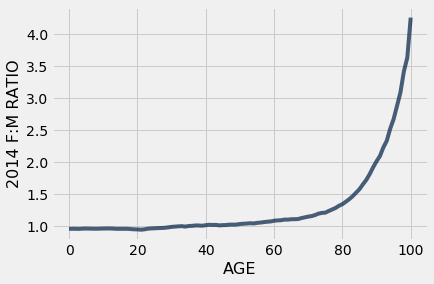

In [79]:
ratios.plot('AGE')

> ### RECAP
---

+ Table 자료 다루기 

- 출력 : show

- Column 선택 : select, column

- Column 추가 : with_column(s)

- Row 선택 : take, where

- Row 정렬 : sort
 

## 참고) function에 대한 궁금증은 help() 혹은 ?를 통해 찾아볼 수 있다.

  \> help(nba.sort)
  
  \> nba.sort?

In [0]:
nba.sort?

In [81]:
help(nba.sort)

Help on method sort in module datascience.tables:

sort(column_or_label, descending=False, distinct=False) method of datascience.tables.Table instance
    Return a Table of rows sorted according to the values in a column.
    
    Args:
        ``column_or_label``: the column whose values are used for sorting.
    
        ``descending``: if True, sorting will be in descending, rather than
            ascending order.
    
        ``distinct``: if True, repeated values in ``column_or_label`` will
            be omitted.
    
    Returns:
        An instance of ``Table`` containing rows sorted based on the values
        in ``column_or_label``.
    
    >>> marbles = Table().with_columns(
    ...    "Color", make_array("Red", "Green", "Blue", "Red", "Green", "Green"),
    ...    "Shape", make_array("Round", "Rectangular", "Rectangular", "Round", "Rectangular", "Round"),
    ...    "Amount", make_array(4, 6, 12, 7, 9, 2),
    ...    "Price", make_array(1.30, 1.30, 2.00, 1.75, 1.40, 1.00)